In [1]:
import pandas as pd

In [4]:
df=pd.read_excel(r"C:\Users\Hp\Downloads\EastWestAirlines.xlsx",sheet_name='data')

In [5]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
#Removing Outliers
from sklearn.ensemble import IsolationForest


In [9]:
# Use Isolation Forest to detect and remove outliers
iso = IsolationForest(contamination=0.1) 
outliers = iso.fit_predict(df)
df = df[outliers == 1]

In [10]:
#Scaling Features
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [12]:
#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


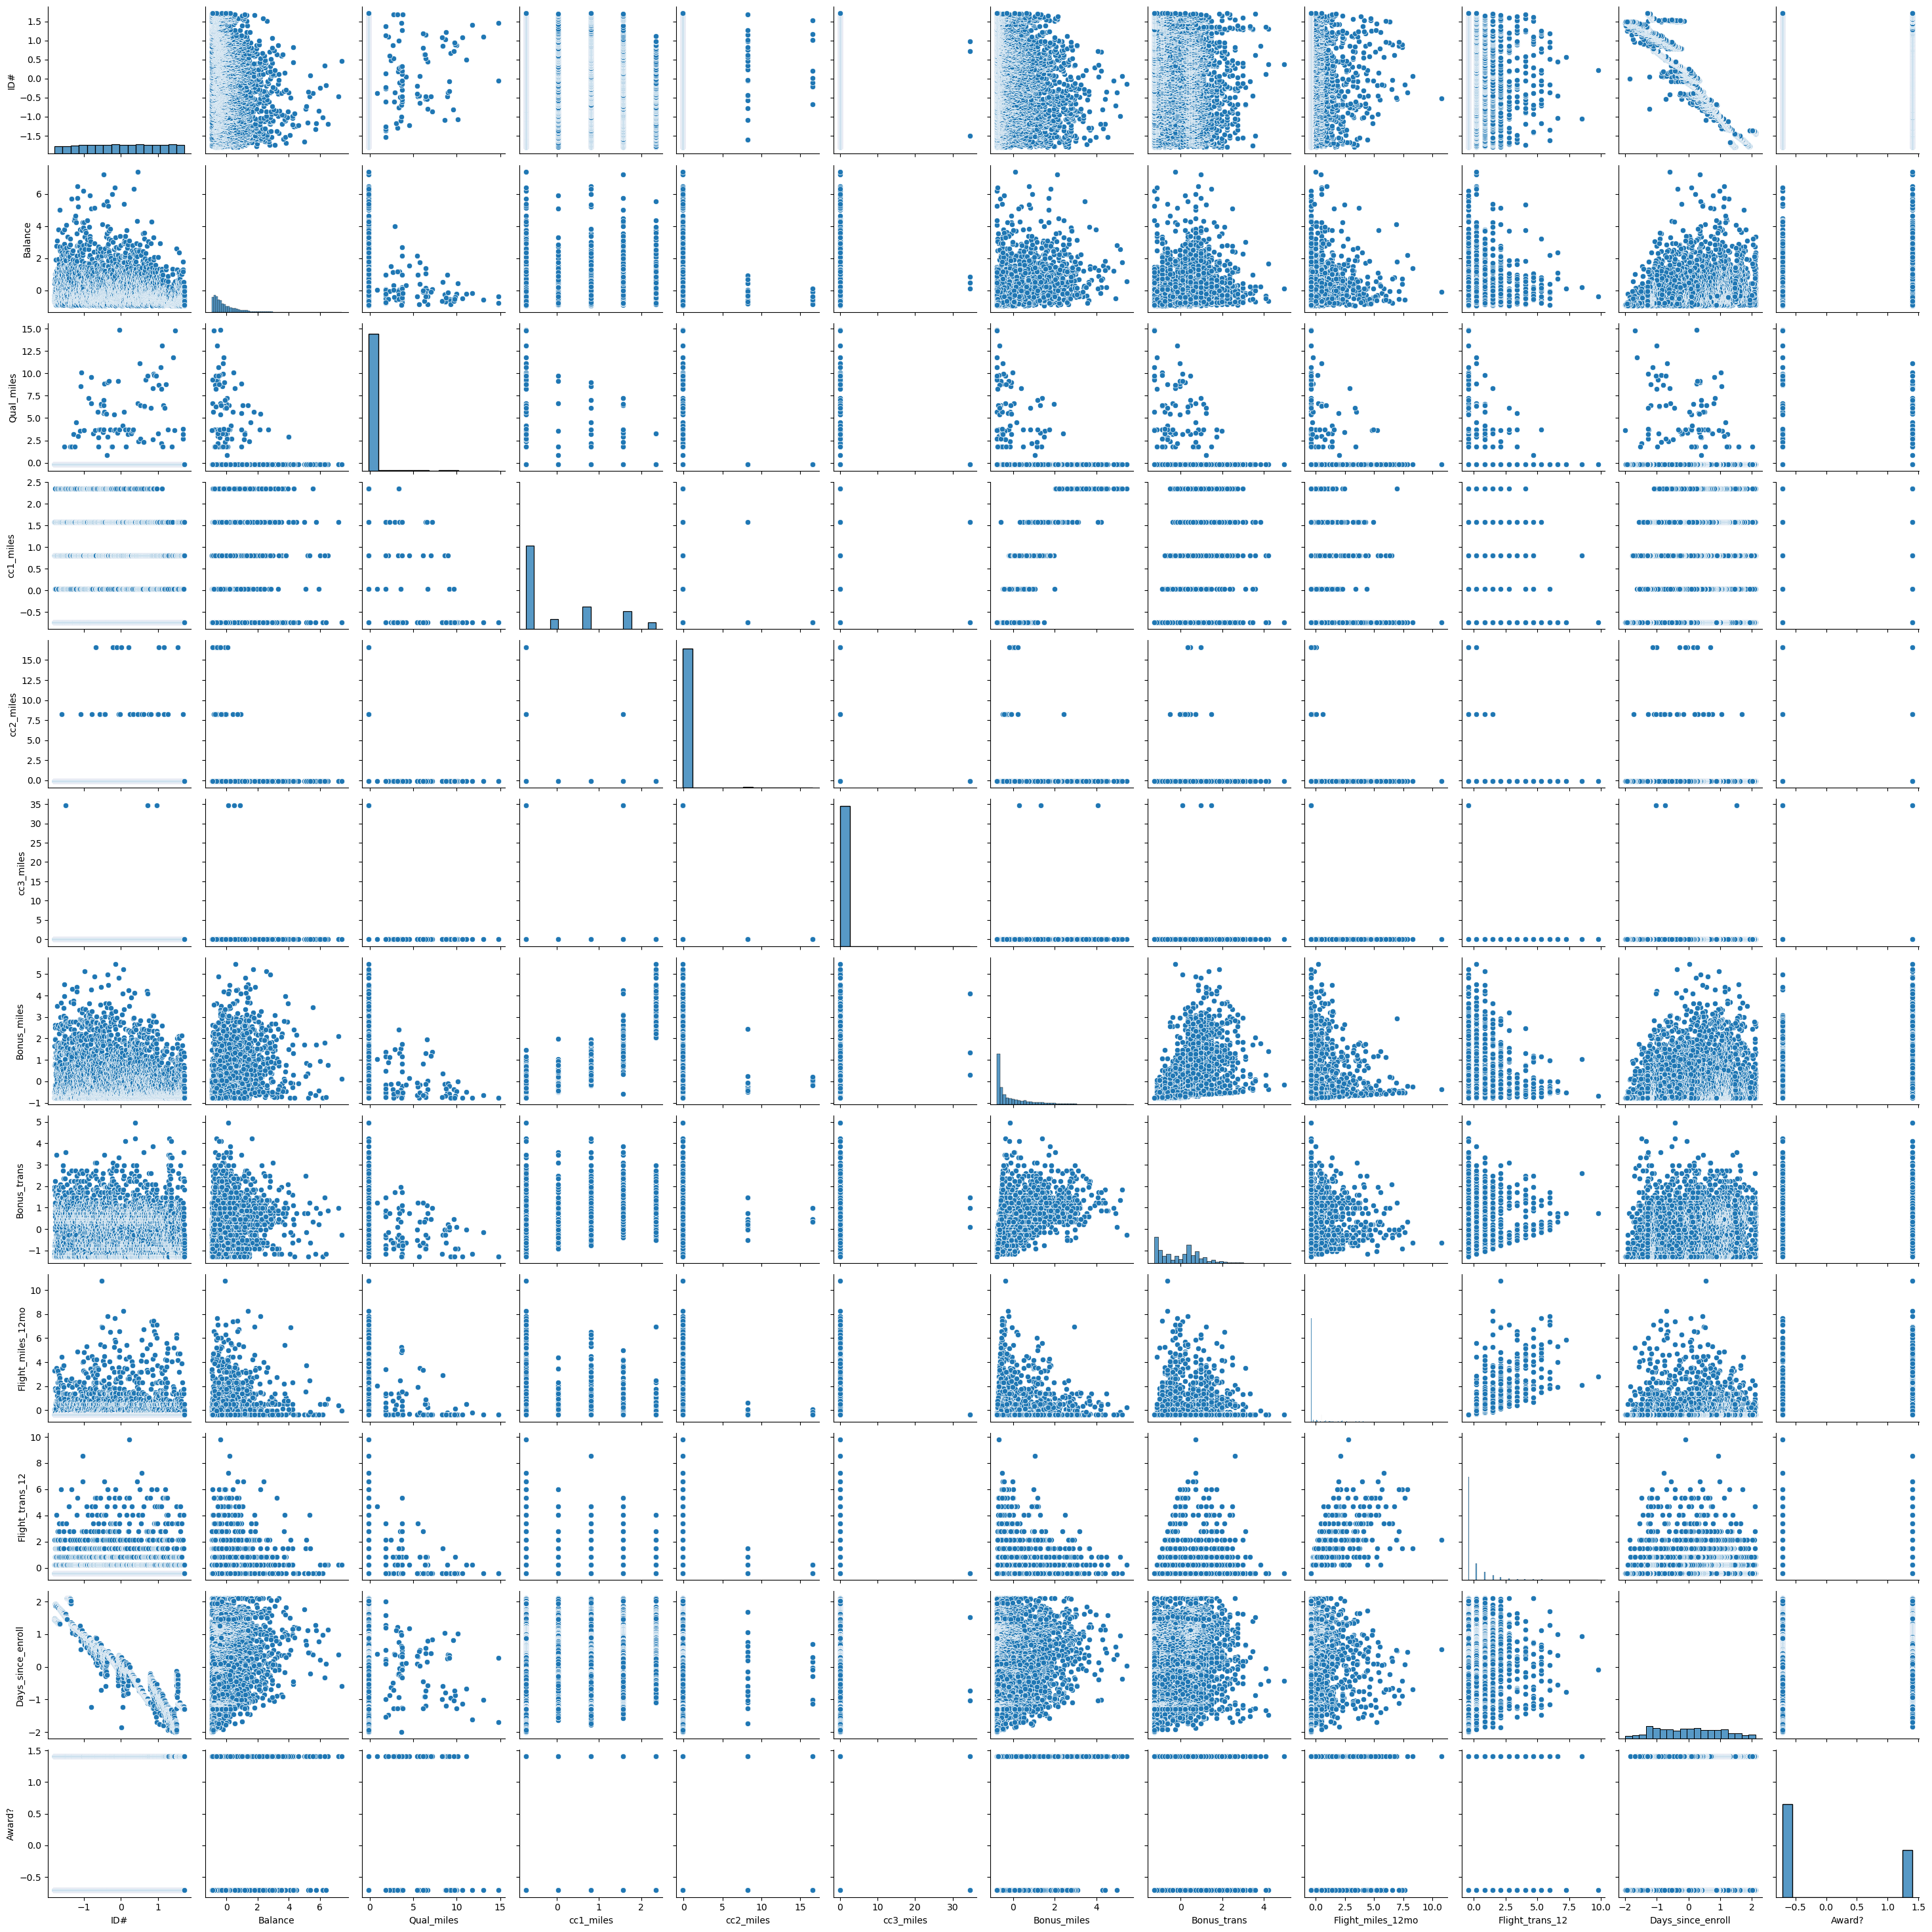

In [13]:
# Pairplot to understand relationships
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()

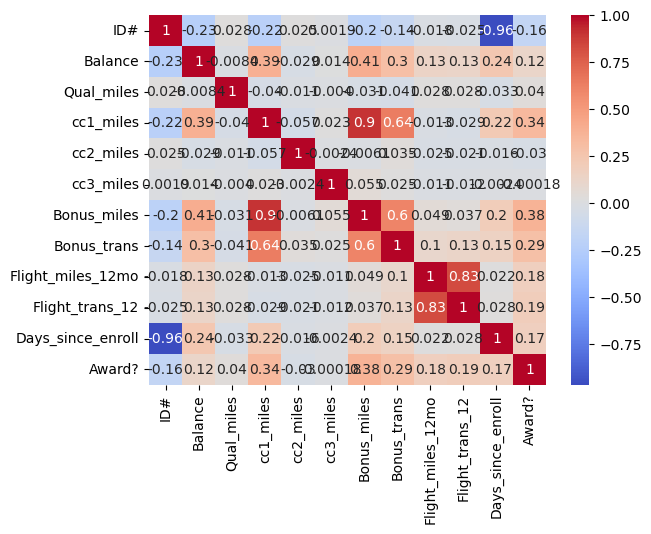

In [14]:
# Correlation heatmap
sns.heatmap(pd.DataFrame(df_scaled, columns=df.columns).corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
#Implementing Clustering Algorithms
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [16]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

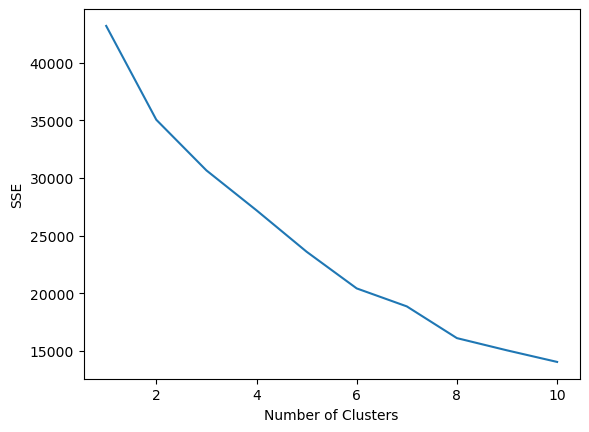

In [17]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
# Apply K-Means with the optimal number of clusters
optimal_k = 4  # Example, you should determine this from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [21]:
# Generate the linkage matrix
Z = linkage(df_scaled, method='ward')

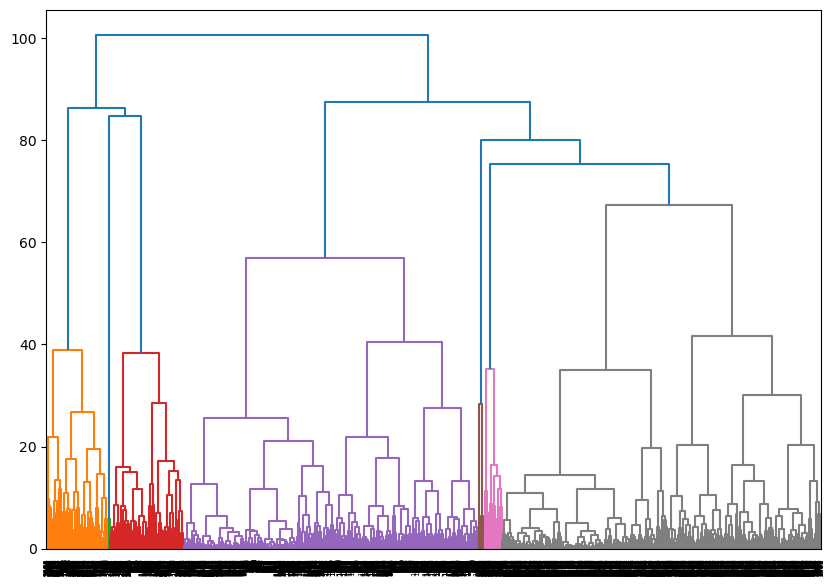

In [22]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

In [23]:
# Apply hierarchical clustering
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)

In [24]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [25]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)

In [26]:
#Cluster Analysis and Interpretation
import numpy as np

In [28]:
# Add cluster labels to the original dataset for interpretation
df_with_labels = pd.DataFrame(df_scaled, columns=df.columns)
df_with_labels['KMeans_Labels'] = kmeans_labels
df_with_labels['Hierarchical_Labels'] = hierarchical_labels
df_with_labels['DBSCAN_Labels'] = dbscan_labels

In [31]:
# Interpret the characteristics of each cluster
kmeans_clusters = df_with_labels.groupby('KMeans_Labels').mean()
hierarchical_clusters = df_with_labels.groupby('Hierarchical_Labels').mean()
dbscan_clusters = df_with_labels[df_with_labels['DBSCAN_Labels'] != -1].groupby('DBSCAN_Labels').mean()


In [32]:
print("K-Means Clusters:\n", kmeans_clusters)
print("Hierarchical Clusters:\n", hierarchical_clusters)
print("DBSCAN Clusters:\n", dbscan_clusters)

K-Means Clusters:
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Labels                                                         
0             -0.373743  0.655150   -0.064574   1.387870  -0.074882   
1             -0.817485 -0.162849    0.004131  -0.538673  -0.022736   
2             -0.001403  0.295284    0.115882  -0.277636  -0.083506   
3              0.957100 -0.393849    0.025097  -0.525258   0.087643   

               cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Labels                                                           
0               0.042709     1.274475     0.944152          -0.105199   
1               0.002646    -0.513684    -0.398682          -0.217031   
2              -0.028884    -0.089730     0.288790           3.164567   
3              -0.028884    -0.493440    -0.408412          -0.258187   

               Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Labels                                       

In [34]:
# Evaluation and Performance Metrics
print("Silhouette Score for K-Means: ", silhouette_kmeans)
print("Silhouette Score for Hierarchical: ", silhouette_hierarchical)
print("Silhouette Score for DBSCAN: ", silhouette_dbscan)

Silhouette Score for K-Means:  0.23596538186944
Silhouette Score for Hierarchical:  0.17356483001478124
Silhouette Score for DBSCAN:  -0.3638859509801642


In [35]:
 from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [36]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df= df[filtered_entries]

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

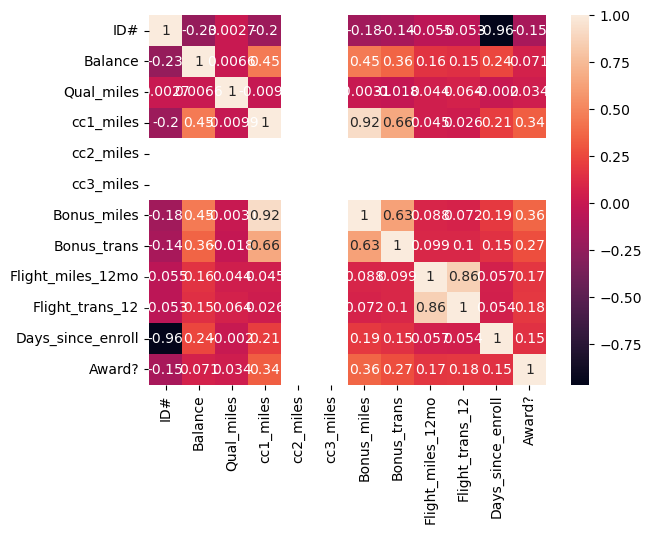

In [38]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [40]:
columns_to_drop = ['highly_correlated_feature1', 'highly_correlated_feature2']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(existing_columns_to_drop, axis=1)

In [41]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


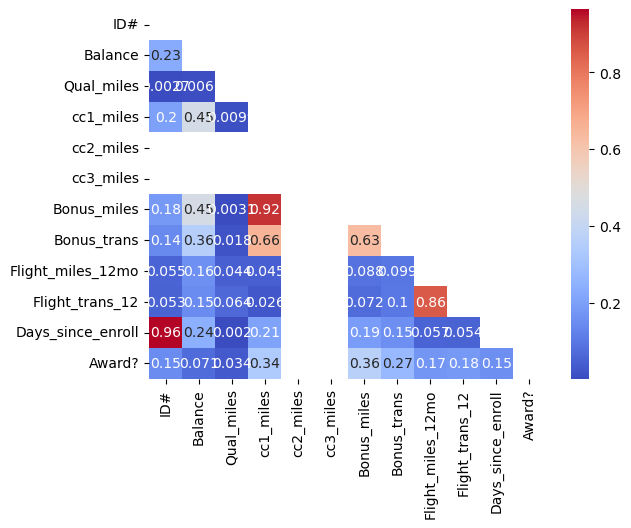

In [42]:
# Generate a correlation matrix
corr_matrix = df.corr().abs()

# Create a mask to ignore the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask and generate the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.show()

# Find the columns that have a correlation higher than a threshold (e.g., 0.9)
threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold) and column not in df.columns[:1]]

df = df.drop(to_drop, axis=1)

In [45]:
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Print the correlation matrix and the upper triangle matrix
print("Correlation Matrix:\n", corr_matrix)
print("Upper Triangle Matrix:\n", upper)

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
df = df.drop(columns=to_drop)

print("Dropped columns:", to_drop)

Correlation Matrix:
            ID#  cc2_miles  cc3_miles
ID#        1.0        NaN        NaN
cc2_miles  NaN        NaN        NaN
cc3_miles  NaN        NaN        NaN
Upper Triangle Matrix:
            ID#  cc2_miles  cc3_miles
ID#        NaN        NaN        NaN
cc2_miles  NaN        NaN        NaN
cc3_miles  NaN        NaN        NaN
Dropped columns: []


In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)  
pca_df = pca.fit_transform(scaled_df)

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

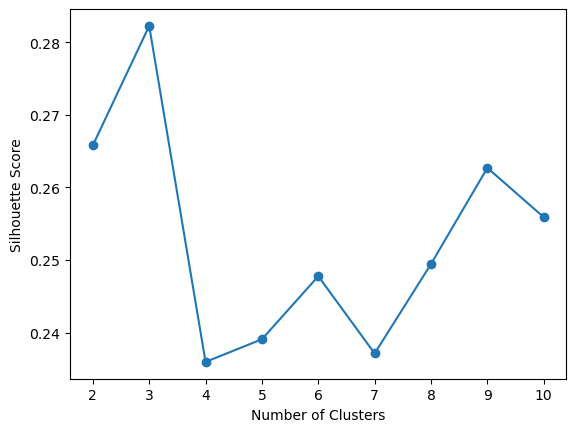

In [50]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
optimal_clusters = 3

In [56]:
for linkage in ['ward', 'complete', 'average', 'single']:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=linkage)
    labels = hierarchical.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f'Linkage: {linkage}, Silhouette Score: {score}')

Linkage: ward, Silhouette Score: 0.15247893495666506
Linkage: complete, Silhouette Score: 0.6475823273307955
Linkage: average, Silhouette Score: 0.6475823273307955
Linkage: single, Silhouette Score: 0.7580712743055558


In [57]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [58]:
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

In [59]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)
        if len(set(labels)) > 1: 
            score = silhouette_score(scaled_df, labels)

In [60]:
print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')

eps: 0.7, min_samples: 7, Silhouette Score: -0.24788467462509325


In [61]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [62]:
# For K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
db_index = davies_bouldin_score(scaled_df, kmeans_labels)
ch_index = calinski_harabasz_score(scaled_df, kmeans_labels)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
print(f'K-Means Davies-Bouldin Index: {db_index}, Calinski-Harabasz Index: {ch_index}')

K-Means Davies-Bouldin Index: 1.407900911324381, Calinski-Harabasz Index: 735.2452930516084


In [64]:
# Advanced Techniques
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering


In [65]:
# GMM
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)
gmm_score = silhouette_score(scaled_df, gmm_labels)

In [66]:
print(f'GMM Silhouette Score: {gmm_score}')


GMM Silhouette Score: 0.12807001025775103


In [68]:
from sklearn.decomposition import PCA

In [70]:
desired_number_of_components = 2 

In [71]:
# Reduce dimensions using PCA
pca = PCA(n_components=desired_number_of_components)
reduced_df = pca.fit_transform(df)

In [72]:
from sklearn.neighbors import kneighbors_graph

In [73]:
# Create a graph with k-nearest neighbors
knn_graph = kneighbors_graph(df, n_neighbors=k, mode='connectivity', include_self=False)

# Apply spectral embedding
from sklearn.manifold import SpectralEmbedding

embedding = SpectralEmbedding(n_components=desired_number_of_components, affinity='precomputed')
reduced_df = embedding.fit_transform(knn_graph)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


In [74]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=optimal_clusters, random_state=42)
spectral_labels = spectral.fit_predict(scaled_df)
spectral_score = silhouette_score(scaled_df, spectral_labels)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [75]:
print(f'Spectral Clustering Silhouette Score: {spectral_score}')

Spectral Clustering Silhouette Score: 0.7580712743055558


In [ ]:
1. K-Means Clustering:
** Davies-Bouldin Index (DBI): 1.4079

* Evaluation: The DBI is a measure of the average similarity ratio of each cluster with its most similar cluster. 
A lower DBI indicates better clustering. Your value of 1.4079 suggests that the clusters are reasonably separated but may still have some overlap or non-compactness.

** Calinski-Harabasz Index (CHI): 735.2453

* Evaluation: The CHI measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion.
Higher values indicate better-defined clusters. A value of 735.2453 is relatively high, suggesting that K-Means has created well-separated and compact clusters.

In [ ]:
2. Gaussian Mixture Model (GMM):
** Silhouette Score: 0.1281
* Evaluation: The Silhouette Score for GMM is quite low, indicating that the clusters are not well-separated or that some points might be near the boundaries of clusters.
This suggests that GMM might not be performing as well on this dataset.

In [ ]:
3. DBSCAN:
** Silhouette Score: -0.2479
* Evaluation: A negative Silhouette Score for DBSCAN indicates poor clustering quality,
suggesting that the clusters might be poorly defined or that many points are incorrectly clustered.
The choice of 'eps' and 'min_samples' may need to be adjusted to improve clustering results.

In [ ]:
4. Hierarchical Clustering:
Ward Linkage: Silhouette Score = 0.152

Evaluation: The Silhouette Score for Ward Linkage is relatively low, indicating that clusters might not be well-separated or cohesive under this linkage method.
Complete Linkage: Silhouette Score = 0.648

Average Linkage: Silhouette Score = 0.648

Evaluation: Both Complete and Average Linkage methods show a good Silhouette Score, indicating that these methods result in reasonably well-separated and cohesive clusters.
Single Linkage: Silhouette Score = 0.758

Evaluation: Single Linkage provides the highest Silhouette Score, suggesting it has the best clustering quality among the hierarchical methods, with well-separated and cohesive clusters.

In [ ]:
5. Spectral Clustering:
Silhouette Score: 0.7581
Evaluation: Spectral Clustering also provides the highest Silhouette Score, similar to Single Linkage Hierarchical Clustering.
This suggests that Spectral Clustering has performed very well in separating and defining clusters.